In [ ]:
! git clone https://github.com/zhouchunpong/GCN_Keras.git

Cloning into 'GCN_Keras'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 65 (delta 3), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (65/65), done.


In [ ]:
!pip install -r GCN_Keras/requirements.txt
!pip install lifelines
!pip install shap
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 25.2 MB 1.3 MB/s 
     |████████████████████████████████| 312 kB 69.4 MB/s 
     |████████████████████████████████| 17.3 MB 58.4 MB/s 
     |████████████████████████████████| 1.6 MB 65.8 MB/s 
     |████████████████████████████████| 377.1 MB 9.2 kB/s 
     |████████████████████████████████| 6.7 MB 53.9 MB/s 
     |████████████████████████████████| 109.3 MB 60 kB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 488 kB 65.2 MB/s 
     |████████████████████████████████| 3.1 MB 60.9 MB/s 
  Created wheel for networkx: filename=networkx-2.1-py2.py3-none-any.whl size=1447361 sha256=d7ddb5a699710f6289ee22033517ec374294a508512b4bb77467efbf179962b7
  Stored in directory: /root/.cache/pip/wheels/48/b1/c4/94ca0cdd84961331402e857d562d9822ccfcb0567c3d064bf2
Successfully built networkx
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully u

     |████████████████████████████████| 349 kB 34.0 MB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 38.1 MB 96.8 MB/s 
     |████████████████████████████████| 15.7 MB 43.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=a29ddfb79820d6083e689da094da85bc2379858dc1398ea315b5ba6f2e57c5e2
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

     |████████████████████████████████| 564 kB 33.6 MB/s 
     |████████████████████████████████| 2.9 MB 27.9 MB/s 
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 wh

In [ ]:

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_up = pd.read_csv('/content/mmrf_Data_Nov2020_CA_del17group.csv')

data_up = np.array(data_up)

os = data_up[0:, 3].astype(float)
#os = os/52
os_event = data_up[0:, 1].astype(int)
pfs = data_up[0:, 2].astype(float)
    #pfs = pfs/52
pfs_event = data_up[0:, 0].astype(int)
b2m = data_up[0:, 4].astype(float)
b2m = b2m * 10
albumin = data_up[0 :, 5].astype(float)
Hb = data_up[0:, 6].astype(float)
egfr = data_up[0:, 7].astype(float)
calcium = data_up[0:, 8].astype(float)
age = data_up[0:, 9].astype(int)
ldh= data_up[0:, 12]
del17=data_up[0:,14].astype(int)
iss = data_up[0:, 15].astype(int)   

feature_matrix=np.stack((b2m, age, albumin, calcium, Hb, egfr, del17), axis = 1)

print(feature_matrix.shape)


(800, 7)


In [ ]:



lab_temp = pd.read_csv('/content/trainCAdata_labels_consensus_MMRF.csv',header=None)

lab = []
for i in range(len(lab_temp)):
    lab.append(int(lab_temp.iat[i,0]))
print("\nList after Addition of elements from 1-3: ")
print(lab)

print(lab.count(2), lab.count(1), lab.count(0))


#classes = set(lab)
#classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
#labels_onehot = np.array(list(map(classes_dict.get, lab)), dtype=np.int32)
#len(labels_onehot)
#y=labels_onehot
y = np.array(lab)
print(lab)
print(y)



List after Addition of elements from 1-3: 
[0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0

In [ ]:
feature_matrix.shape, y.shape

((800, 7), (800,))

In [ ]:
X = feature_matrix

In [ ]:
#data_t = pd.read_csv('../MRS_traindata_AIIMS_new2.csv')
data_up =  pd.read_csv('/content/AIIMS_CAdata_groups.csv')
data_up = np.array(data_up)


albumin = data_up[0 :, 3].astype(float)
b2m = data_up[0:, 4].astype(float)
#b2m = b2m * 10
Hb = data_up[0:, 7].astype(float)
calcium = data_up[0:, 9].astype(float)
egfr = data_up[0:, 23].astype(float)

age = data_up[0:, 1].astype(int)
del17 = data_up[0:,32].astype(int)

#feature_matrix=np.stack((age, albumin,b2m,calcium,egfr,Hb), axis = 1)
feature_matrix=np.stack((b2m, age, albumin, calcium, Hb, egfr, del17), axis = 1)

print(feature_matrix.shape)

os = data_up[0:,17].astype(float)
os_event = data_up[0:, 16].astype(int)
pfs = data_up[0:, 13].astype(float)
pfs_event =  data_up[0:, 12].astype(int)



Xval = feature_matrix


lab_temp = pd.read_csv('/content/trainCAdata_labels_consensus_AIIMS.csv',header=None)

lab = []
for i in range(len(lab_temp)):
    lab.append(int(lab_temp.iat[i,0]))
print("\nList after Addition of elements from 1-3: ")
print(lab)

print(lab.count(2), lab.count(1), lab.count(0))


#classes = set(lab)
#classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
#labels_onehot = np.array(list(map(classes_dict.get, lab)), dtype=np.int32)
#len(labels_onehot)
#y=labels_onehot
yval = np.array(lab)
print(lab)
print(yval)


(384, 7)

List after Addition of elements from 1-3: 
[0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2

In [ ]:
X.shape, y.shape, Xval.shape, yval.shape

((800, 7), (800,), (384, 7), (384,))

In [ ]:
%cd GCN_Keras/

/content/GCN_Keras


In [ ]:
from __future__ import print_function

import keras
from keras.layers import Input, Dense, Dropout, GaussianNoise
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint


from graph import GraphConvolution
from utils import *
import scipy
import seaborn as sns

import CRSS_MMRF_functions as cf


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [ ]:
import tensorflow
tensorflow.__version__

'1.14.0'

In [ ]:
def get_adjs(b2m, age, albumin, calcium, Hb, egfr, del17,os, pfs, os_event, pfs_event):
    
    adj1 = np.array(cf.adjacency_matrix1(b2m, age, albumin, calcium, Hb, egfr, del17)).astype(float)
    adj2 = np.array(cf.adjacency_matrix2(b2m, age, albumin, calcium, Hb, egfr, del17, os, pfs, os_event, pfs_event)).astype(float)
    adj3 = np.array(cf.adjacency_matrix3(b2m, age, albumin, calcium, Hb, egfr, del17)).astype(float)
    
    return adj1, adj2, adj3

In [ ]:
# Define parameters
FILTER = 'localpool'  # 'localpool' or 'chebyshev'
MAX_DEGREE = 2  # maximum polynomial degree
SYM_NORM = True  # symmetric (True) vs. left-only (False) normalization
NB_EPOCH = 200
PATIENCE = 50  # early stopping patience

In [ ]:
# Get data
# X:features  A:graph  y:labels
#X, A, y = load_data(dataset='cora', use_feature=True)
#y_train, y_val, y_test, train_mask, val_mask, test_mask = get_splits(y)

# Normalize X
X /= X.sum(1).reshape(-1, 1)
#A[A > 0.] = 1.
# Xval /= Xval.sum(1).reshape(-1, 1)
# t = np.mean(A) - np.std(A)
# A[A < t] = 0.0

(800, 800)


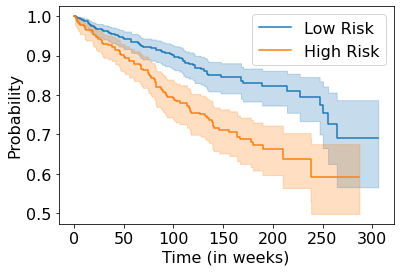

1.7607443329362156e-05


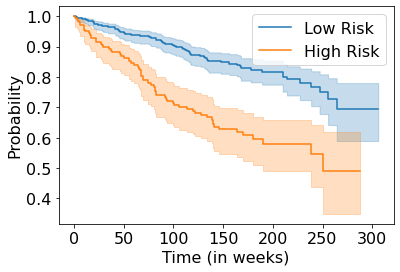

6.648370200659178e-10


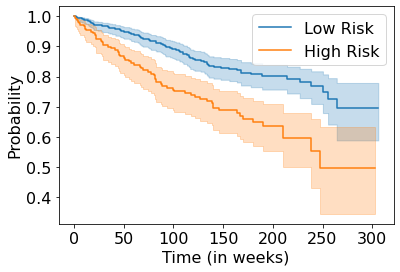

2.0731096894415663e-06


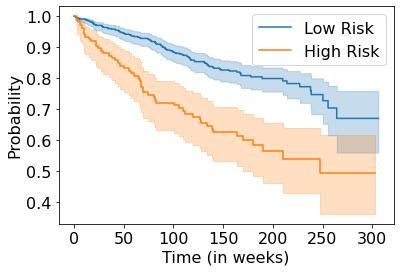

4.326473531117712e-08


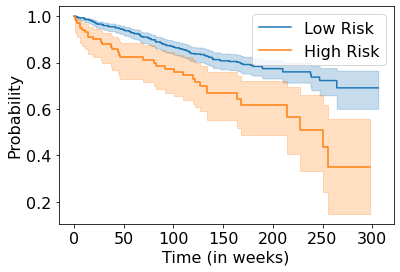

3.8234184712219173e-05


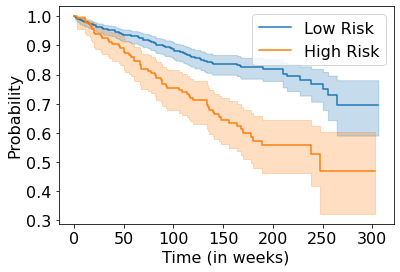

3.294821654541348e-08


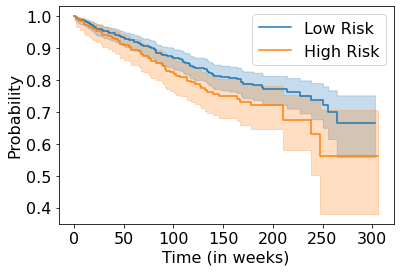

0.05297911521044501


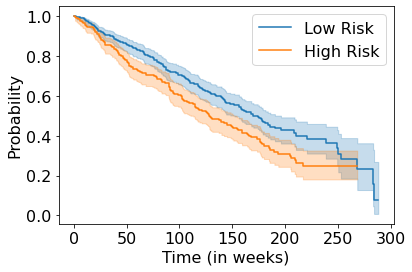

0.0012154336389177543


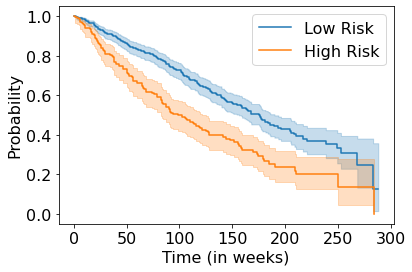

2.5516400279453765e-08


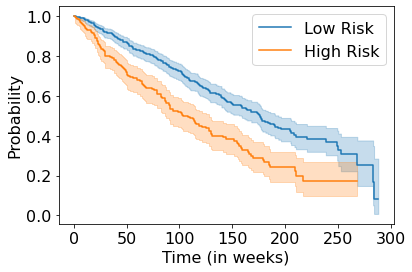

1.561630863531077e-08


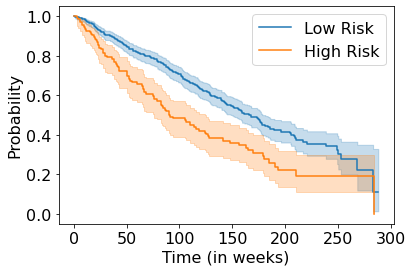

3.562278998609506e-06


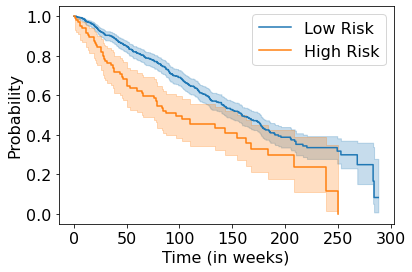

0.00024805345734520406


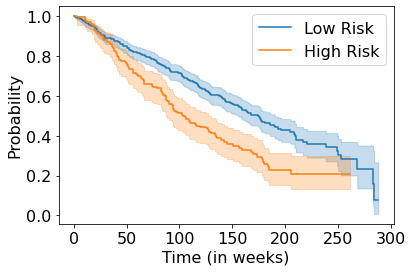

5.0855459054562516e-06


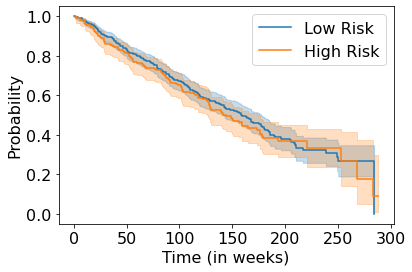

0.47991223488370316
[5.67941626e+04 1.50412803e+09 6.40356196e+07 2.31135125e+07
 2.61546050e+04 3.03506564e+07 1.88753624e+01]


In [ ]:
A1, A2, A3 = get_adjs(b2m, age, albumin, calcium, Hb, egfr, del17,os, pfs, os_event, pfs_event)

A1 = A1 + -1*np.min(A1)

#A1[ A1 < 0.] = 0.

A1=scipy.sparse.csr_matrix(A1)
A2=scipy.sparse.csr_matrix(A2)
A3=scipy.sparse.csr_matrix(A3)

A1 = preprocess_adj(A1, SYM_NORM)
A2 = preprocess_adj(A2, SYM_NORM)
A3 = preprocess_adj(A3, SYM_NORM)





In [ ]:
alpha = 0.7
A_ = A1*alpha + A2*(alpha**2) + A3*(alpha**3)

In [ ]:
support = 1
graph = [X, A_]

(384, 384)


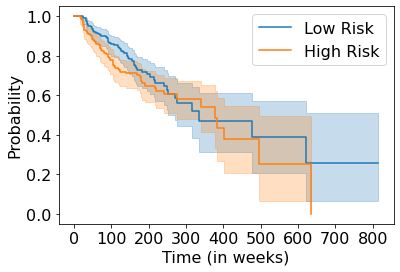

0.18606535504170316


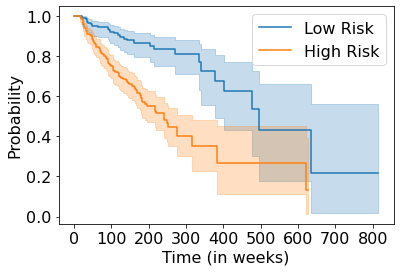

7.350076132298336e-09


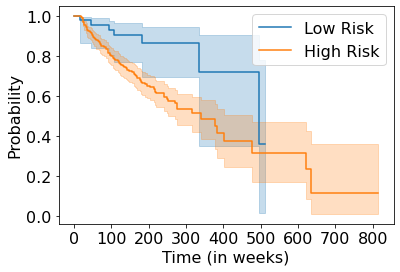

0.006943730384707858


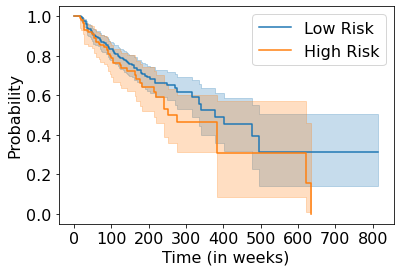

0.14270741807094062


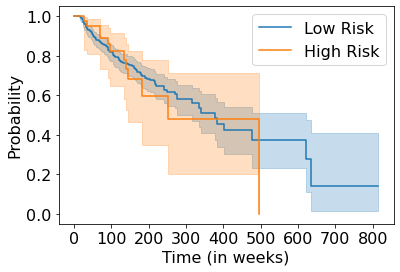

0.6440867994105728


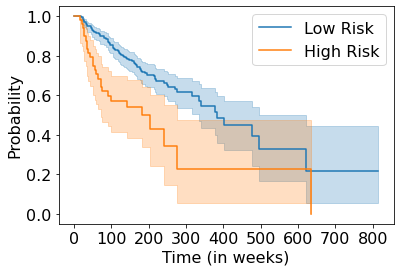

2.9171318567341112e-05


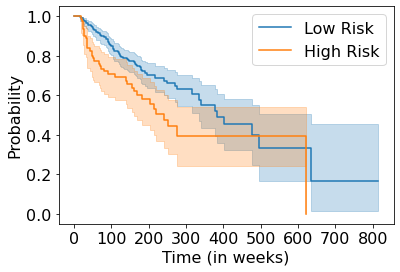

0.0009221019377070573


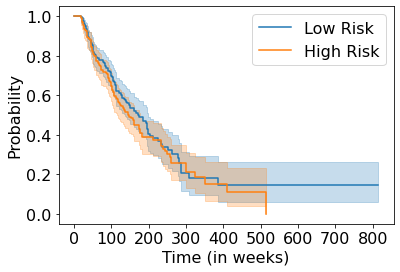

0.3634399896518178


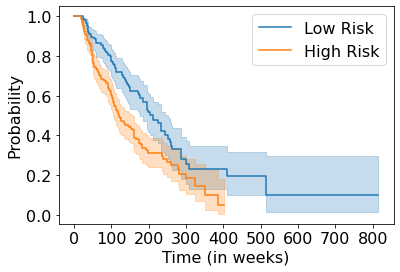

0.0001309136591891492


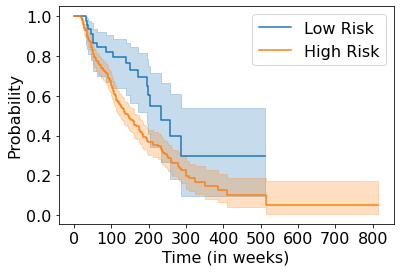

0.007145986294444671


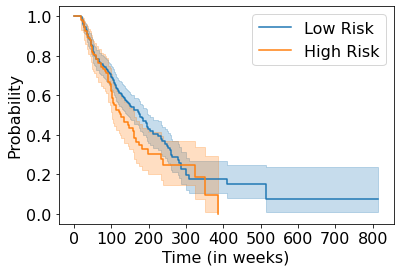

0.10529005367573996


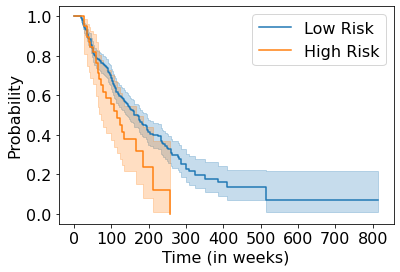

0.023236309524362654


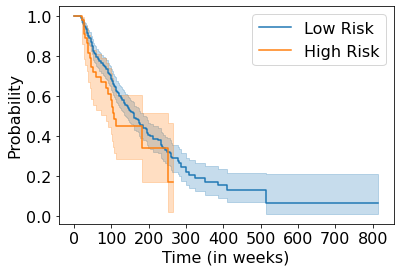

0.1735168486561936


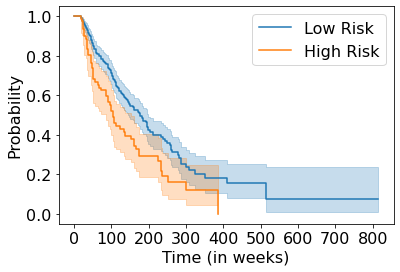

0.0007727616932011395
[5.37445566e+00 1.36053013e+08 1.44014808e+02 9.49757328e+00
 4.30360940e+01 3.42802468e+04 1.29406000e+03]


In [ ]:
import CRSS_AIIMS_functions as cf


A1, A2, A3 = get_adjs(b2m, age, albumin, calcium, Hb, egfr, del17,os, pfs, os_event, pfs_event)

A1 = A1 + -1*np.min(A1)

#A1[ A1 < 0.] = 0.

A1=scipy.sparse.csr_matrix(A1)
A2=scipy.sparse.csr_matrix(A2)
A3=scipy.sparse.csr_matrix(A3)

A1 = preprocess_adj(A1, SYM_NORM)
A2 = preprocess_adj(A2, SYM_NORM)
A3 = preprocess_adj(A3, SYM_NORM)

alpha = 0.7
A_ = A1*alpha + A2*(alpha**2) + A3*(alpha**3)

graphval = [Xval, A_]

In [ ]:
graphval = [Xval, A_]

In [ ]:
# Define model architecture
# NOTE: We pass arguments for graph convolutional layers as a list of tensors.
G = [Input(shape=(None,))]
X_in = Input(shape=(X.shape[1],))

H = GraphConvolution(16, support, activation='relu')([X_in]+G)
#H = Dropout(rate=0.1)(H)
Y = Dense(3, activation='softmax')(H)

In [ ]:
np.bincount(y)

array([450, 174, 176])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
compute_class_weight("balanced",[0,1,2], y)

array([0.59259259, 1.53256705, 1.51515152])

In [ ]:
# Callbacks for EarlyStopping
#es_callback = EarlyStopping(monitor='weighted_acc', patience=200)
#class_weights = { 0 : 1.21 , 1 : 0.76, 2 : 1.18}
class_weights = { 0 : 0.59 , 1 : 1.53, 2 : 1.51}

In [ ]:
# Compile model
model = Model(inputs=[X_in]+G, outputs=Y)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.01, beta_1=0.1), metrics=['acc'])
model.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
graph_convolution_1 (GraphConvo (None, 16)           128         input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            51          graph_convolution_1[0][0]        
Total pa

In [ ]:
A1.shape

(800, 800)

In [ ]:
Xval

array([[0.0267959 , 0.31356899, 0.01995439, ..., 0.05473204, 0.52622577,
        0.00570125],
       [0.10334646, 0.57086614, 0.03149606, ..., 0.07972441, 0.11417323,
        0.00984252],
       [0.12080537, 0.40268456, 0.02876318, ..., 0.07861937, 0.2780441 ,
        0.00958773],
       ...,
       [0.02098952, 0.31317896, 0.02218351, ..., 0.07438   , 0.50891581,
        0.        ],
       [0.00757976, 0.39661555, 0.03437335, ..., 0.09518773, 0.38075093,
        0.        ],
       [0.03179474, 0.27420513, 0.02219756, ..., 0.03721355, 0.56864921,
        0.00652869]])

In [ ]:
def sample_mask(idx, l):
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

idx_train = range(640)
idx_val = range(640, 800)
    
y_train = np.zeros(y.shape, dtype=np.int32) #y:label
y_val = np.zeros(y.shape, dtype=np.int32)

y_train[idx_train] = y[idx_train]
y_val[idx_val] = y[idx_val]

train_mask = sample_mask(idx_train, y.shape[0])
val_mask = sample_mask(idx_val, y.shape[0])

In [ ]:
# Train
# validation_data = (graphval, yval)
validation_data = (graph, y_val, val_mask)
history2 = model.fit(graph, y, sample_weight=train_mask,
          batch_size=800,
          class_weight = class_weights, 
          epochs=3000,
          verbose=1,
          validation_data=validation_data,
          shuffle=False,
          #callbacks=[es_callback]
          )

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
800/800 [==============================] - 0s 20us/step - loss: 0.1580 - acc: 0.9500 - val_loss: 0.1345 - val_acc: 0.6338
Epoch 502/3000
800/800 [==============================] - 0s 19us/step - loss: 0.1577 - acc: 0.9475 - val_loss: 0.1318 - val_acc: 0.6463
Epoch 503/3000
800/800 [==============================] - 0s 20us/step - loss: 0.1575 - acc: 0.9500 - val_loss: 0.1336 - val_acc: 0.6338
Epoch 504/3000
800/800 [==============================] - 0s 19us/step - loss: 0.1572 - acc: 0.9475 - val_loss: 0.1316 - val_acc: 0.6463
Epoch 505/3000
800/800 [==============================] - 0s 19us/step - loss: 0.1570 - acc: 0.9500 - val_loss: 0.1329 - val_acc: 0.6338
Epoch 506/3000
800/800 [==============================] - 0s 18us/step - loss: 0.1568 - acc: 0.9475 - val_loss: 0.1314 - val_acc: 0.6463
Epoch 507/3000
800/800 [==============================] - 0s 18us/step - loss: 0.1566 - acc: 0.9500 - val_loss: 0.1323 - val_ac

In [ ]:
model.evaluate(graph,y,sample_weight=train_mask,batch_size=800)

800/800 [==============================] - 0s 37us/step


[0.07784930616617203, 0.9700000286102295]

In [ ]:
model.evaluate(graph,y,batch_size=800)

800/800 [==============================] - 0s 19us/step


[0.07498984038829803, 0.9700000286102295]

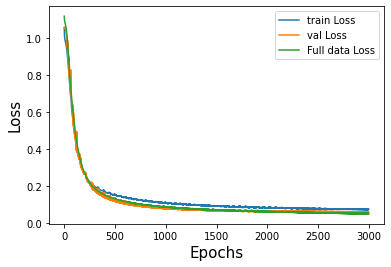

In [ ]:
plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.plot(history2.history['loss'], label='Full data Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.savefig('mmrf_train80_val20_all_loss.pdf', format='pdf', dpi=600, facecolor='white', bbox_inches='tight')
plt.show()

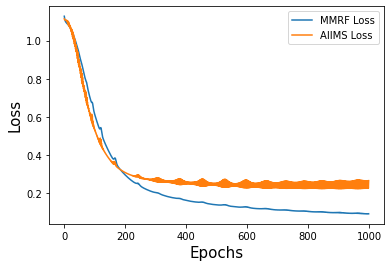

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][:1000], label='MMRF Loss')
plt.plot(history.history['val_loss'][:1000], label='AIIMS Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
#plt.savefig('mmrf_train_loss.pdf', format='pdf', dpi=600, facecolor='white', bbox_inches='tight')

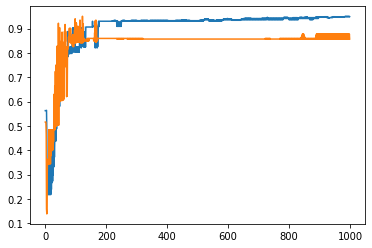

In [ ]:
plt.plot(history.history['acc'][:1000])
plt.plot(history.history['val_acc'][:1000])

In [ ]:
model.load_weights('/content/best_model_16unit_3000epochs_weights.h5')

In [ ]:
import time

In [ ]:
t = time.time()

A1, A2, A3 = get_adjs(b2m, age, albumin, calcium, Hb, egfr, del17,os, pfs, os_event, pfs_event)

A1 = A1 + -1*np.min(A1)

#A1[ A1 < 0.] = 0.

A1=scipy.sparse.csr_matrix(A1)
A2=scipy.sparse.csr_matrix(A2)
A3=scipy.sparse.csr_matrix(A3)

A1 = preprocess_adj(A1, SYM_NORM)
A2 = preprocess_adj(A2, SYM_NORM)
A3 = preprocess_adj(A3, SYM_NORM)

alpha = 0.7
A_ = A1*alpha + A2*(alpha**2) + A3*(alpha**3)

support = 1
graph = [X, A_]

preds = np.argmax(model.predict(graph, batch_size=800),axis=1)



time.time() - t

0.021211862564086914

array([2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2,

In [ ]:
# Evaluate model on the test data
eval_results = model.evaluate(graph,y,
                              batch_size=A1.shape[0])
print('Test Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

800/800 [==============================] - 0s 57us/step
Test Done.
Test loss: 0.05962206795811653
Test accuracy: 0.9787499904632568


In [ ]:
# Evaluate model on the test data
eval_results = model.evaluate(graph,y,
                              batch_size=800)
print('Test Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

800/800 [==============================] - 0s 28us/step
Test Done.
Test loss: 0.07147616147994995
Test accuracy: 0.9762499928474426


In [ ]:
preds = model.predict(graph, batch_size=800)

lab_pred = list(np.argmax(preds,1))

187 174 439
inf
inf
0.0002419530480329838 GCRS 1-2
238.0
6.004319026349253e-14 GCRS 2-3

 P value :  2.348678090381988e-17


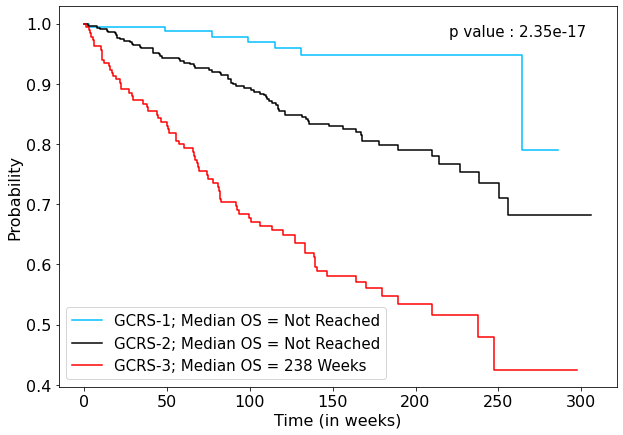

In [ ]:


print(lab_pred.count(2), lab_pred.count(1), lab_pred.count(0))
os_0 = []
os_1 = []
os_2 = []
os_ev_0 = []
os_ev_1 = []
os_ev_2 = []
plt.figure(figsize=(10,7))
for i in range(os_event.shape[0]):
       
    if lab_pred[i] == 0:
        os_0.append(os[i])
        os_ev_0.append(os_event[i])
    elif lab_pred[i] == 1:
        os_1.append(os[i])
        os_ev_1.append(os_event[i])
    else:
        os_2.append(os[i])
        os_ev_2.append(os_event[i])
        
kmf2 = KaplanMeierFitter()
kmf2.fit(os_1, os_ev_1, label='GCRS-1; Median OS = Not Reached')
print(kmf2._median)
a2 = kmf2.plot(ci_show=False, color='deepskyblue')
## fit the model for 2nd cohort
kmf2.fit(os_0, os_ev_0, label='GCRS-2; Median OS = Not Reached')
print(kmf2._median)
kmf2.plot(ax = a2,ci_show=False, color='k')
results = logrank_test(os_0, os_1, event_observed_A = os_ev_0, event_observed_B = os_ev_1)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(os_2, os_ev_2, label='GCRS-3; Median OS = 238 Weeks')
print(kmf2._median)
kmf2.plot(ax = a2, fontsize = 16,ci_show=False, color='r')#.get_figure().savefig('/content/MMRF_N800_OS.pdf')
results = logrank_test(os_1, os_2, event_observed_A = os_ev_1, event_observed_B = os_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 
#results = logrank_test(os_0, os_2, event_observed_A = os_ev_0, event_observed_B = os_ev_2)
# results.print_summary()
#print(results.p_value, "inter high") 
a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 15)

from lifelines.statistics import multivariate_logrank_test
results = multivariate_logrank_test(os, lab_pred, os_event)
print("\n P value : ",results.p_value)
plt.text(220, 0.98, str('p value : '+'%.2e' % results.p_value), fontsize=15)
plt.savefig('/content/GCRS_mmrf_os.pdf',format='pdf',dpi=600, bbox_inches='tight')
plt.show()
# c0 = 0
# c1 = 0
# c2 = 0
# for i in range(len(lab_pred)):
#     if lab[i] == 0 and os[i]/52 >= 3:
#         c0 += 1
#     if lab[i] == 1 and os[i]/52 >= 3:
#         c1 += 1
#     if lab[i] == 2 and os[i]/52 >= 3:
#         c2 += 1
# print(c0/len(os_0))
# print(c1/len(os_1))
# print(c2/ len(os_2))
# print(len(os_0))
# print(len(os_1))
# print(len(os_2))

169 174 457
inf
inf
0.00010179912436314842 GCRS 1-2
238.0
7.275568348062852e-14 GCRS 2-3

 P value :  8.075018905062619e-16


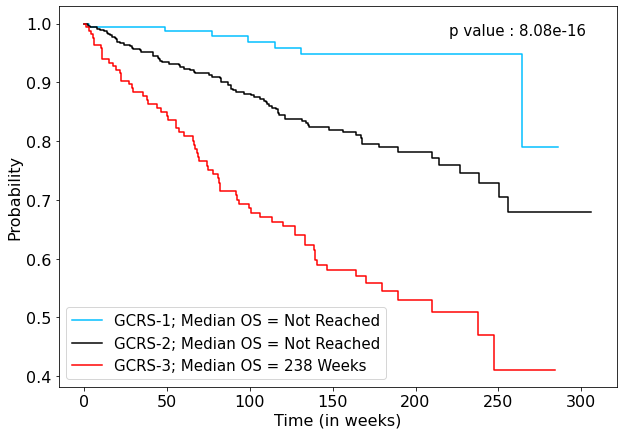

In [ ]:


print(lab_pred.count(2), lab_pred.count(1), lab_pred.count(0))
os_0 = []
os_1 = []
os_2 = []
os_ev_0 = []
os_ev_1 = []
os_ev_2 = []
plt.figure(figsize=(10,7))
for i in range(os_event.shape[0]):
       
    if lab_pred[i] == 0:
        os_0.append(os[i])
        os_ev_0.append(os_event[i])
    elif lab_pred[i] == 1:
        os_1.append(os[i])
        os_ev_1.append(os_event[i])
    else:
        os_2.append(os[i])
        os_ev_2.append(os_event[i])
        
kmf2 = KaplanMeierFitter()
kmf2.fit(os_1, os_ev_1, label='GCRS-1; Median OS = Not Reached')
print(kmf2._median)
a2 = kmf2.plot(ci_show=False, color='deepskyblue')
## fit the model for 2nd cohort
kmf2.fit(os_0, os_ev_0, label='GCRS-2; Median OS = Not Reached')
print(kmf2._median)
kmf2.plot(ax = a2,ci_show=False, color='k')
results = logrank_test(os_0, os_1, event_observed_A = os_ev_0, event_observed_B = os_ev_1)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(os_2, os_ev_2, label='GCRS-3; Median OS = 238 Weeks')
print(kmf2._median)
kmf2.plot(ax = a2, fontsize = 16,ci_show=False, color='r')#.get_figure().savefig('/content/MMRF_N800_OS.pdf')
results = logrank_test(os_1, os_2, event_observed_A = os_ev_1, event_observed_B = os_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 
#results = logrank_test(os_0, os_2, event_observed_A = os_ev_0, event_observed_B = os_ev_2)
# results.print_summary()
#print(results.p_value, "inter high") 
a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 15)

from lifelines.statistics import multivariate_logrank_test
results = multivariate_logrank_test(os, lab_pred, os_event)
print("\n P value : ",results.p_value)
plt.text(220, 0.98, str('p value : '+'%.2e' % results.p_value), fontsize=15)
plt.savefig('/content/GCRS_mmrf_os.pdf',format='pdf',dpi=600, bbox_inches='tight')
plt.show()
# c0 = 0
# c1 = 0
# c2 = 0
# for i in range(len(lab_pred)):
#     if lab[i] == 0 and os[i]/52 >= 3:
#         c0 += 1
#     if lab[i] == 1 and os[i]/52 >= 3:
#         c1 += 1
#     if lab[i] == 2 and os[i]/52 >= 3:
#         c2 += 1
# print(c0/len(os_0))
# print(c1/len(os_1))
# print(c2/ len(os_2))
# print(len(os_0))
# print(len(os_1))
# print(len(os_2))

PFS Analysis
249.4 **
159.3 **
0.0013751391586993601 GCRS 1-2
86.3 **
4.366316633251357e-12 GCRS 2-3

 P value :  2.3156620467317e-13


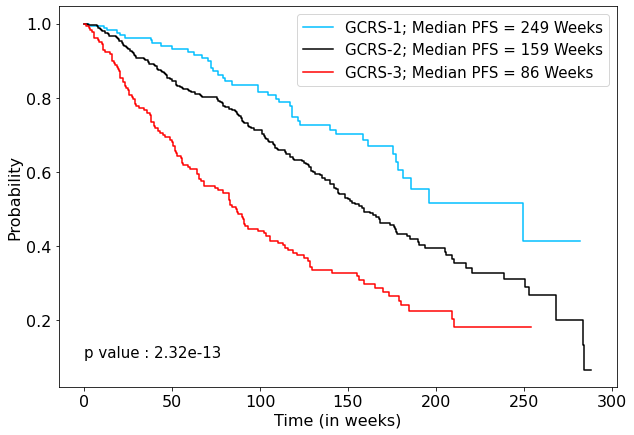

In [ ]:
##PFS anaylsis on training data for MRS
print("PFS Analysis")
pfs_0 = []
pfs_1 = []
pfs_2 = []
pfs_ev_0 = []
pfs_ev_1 = []
pfs_ev_2 = []
plt.figure(figsize=(10,7))
for i in range(pfs.shape[0]):    
    if lab_pred[i] == 0:
        pfs_0.append(pfs[i])
        pfs_ev_0.append(pfs_event[i])
    elif lab_pred[i] == 1:
        pfs_1.append(pfs[i])
        pfs_ev_1.append(pfs_event[i])
    else:
        pfs_2.append(pfs[i])
        pfs_ev_2.append(pfs_event[i])
        
        
kmf2 = KaplanMeierFitter()
## fit the model for 2nd cohort
kmf2.fit(pfs_1, pfs_ev_1, label='GCRS-1; Median PFS = 249 Weeks')
print(kmf2._median, "**")
a2 = kmf2.plot(ci_show=False, color='deepskyblue')


kmf2.fit(pfs_0, pfs_ev_0, label='GCRS-2; Median PFS = 159 Weeks')
print(kmf2._median, "**")
kmf2.plot(ax = a2, fontsize = 16,ci_show=False, color='k')

results = logrank_test(pfs_1, pfs_0, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_0)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(pfs_2, pfs_ev_2, label='GCRS-3; Median PFS = 86 Weeks')
print(kmf2._median, "**")
kmf2.plot(ax = a2,ci_show=False, color='r')#.get_figure().savefig('/content/MMRF_N800_PFS.pdf')

results = logrank_test(pfs_1, pfs_2, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 

a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 15)


results = multivariate_logrank_test(pfs, lab_pred, pfs_event)
print("\n P value : ",results.p_value)

plt.text(0., 0.1, str('p value : '+'%.2e' % results.p_value), fontsize=15)
plt.savefig('/content/GCRS_mmrf_pfs.pdf',format='pdf',dpi=600, bbox_inches='tight')
plt.show()

PFS Analysis
249.4 **
156.3 **
0.0006169337421530811 GCRS 1-2
87.6 **
1.206590085898819e-11 GCRS 2-3

 P value :  5.924997112818414e-12


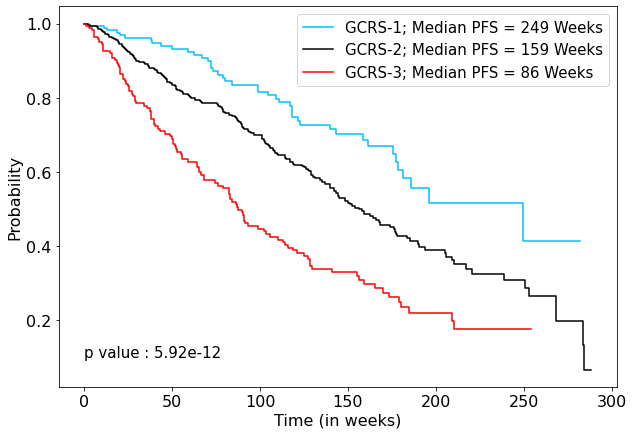

In [ ]:
##PFS anaylsis on training data for MRS
print("PFS Analysis")
pfs_0 = []
pfs_1 = []
pfs_2 = []
pfs_ev_0 = []
pfs_ev_1 = []
pfs_ev_2 = []
plt.figure(figsize=(10,7))
for i in range(pfs.shape[0]):    
    if lab_pred[i] == 0:
        pfs_0.append(pfs[i])
        pfs_ev_0.append(pfs_event[i])
    elif lab_pred[i] == 1:
        pfs_1.append(pfs[i])
        pfs_ev_1.append(pfs_event[i])
    else:
        pfs_2.append(pfs[i])
        pfs_ev_2.append(pfs_event[i])
        
        
kmf2 = KaplanMeierFitter()
## fit the model for 2nd cohort
kmf2.fit(pfs_1, pfs_ev_1, label='GCRS-1; Median PFS = 249 Weeks')
print(kmf2._median, "**")
a2 = kmf2.plot(ci_show=False, color='deepskyblue')


kmf2.fit(pfs_0, pfs_ev_0, label='GCRS-2; Median PFS = 159 Weeks')
print(kmf2._median, "**")
kmf2.plot(ax = a2, fontsize = 16,ci_show=False, color='k')

results = logrank_test(pfs_1, pfs_0, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_0)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(pfs_2, pfs_ev_2, label='GCRS-3; Median PFS = 86 Weeks')
print(kmf2._median, "**")
kmf2.plot(ax = a2,ci_show=False, color='r')#.get_figure().savefig('/content/MMRF_N800_PFS.pdf')

results = logrank_test(pfs_1, pfs_2, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 

a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 15)


results = multivariate_logrank_test(pfs, lab_pred, pfs_event)
print("\n P value : ",results.p_value)

plt.text(0., 0.1, str('p value : '+'%.2e' % results.p_value), fontsize=15)
plt.savefig('/content/GCRS_mmrf_pfs.pdf',format='pdf',dpi=600, bbox_inches='tight')
plt.show()

# CoxHazard Analysis

In [ ]:
len(lab_pred)


800

In [ ]:
lab = lab_pred[:]

In [ ]:
print(lab.count(2), lab.count(1), lab.count(0))

187 174 439


In [ ]:
pd.get_dummies(lab)

,0,1,2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
795,0,0,1
796,0,0,1
797,0,0,1
798,0,1,0


In [ ]:
gcrs1v0 = np.array(pd.get_dummies(lab))[:,0].reshape(-1,1)
gcrs2v0 = np.array(pd.get_dummies(lab))[:,2].reshape(-1,1)

In [ ]:
os = os.reshape(-1,1)
os_event = os_event.reshape(-1,1)
pfs = pfs.reshape(-1,1)
pfs_event = pfs_event.reshape(-1,1)
lab = np.array(lab).reshape(-1,1)

In [ ]:
gcrs1v0.shape, os.shape

((800, 1), (800, 1))

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
data_cox_os = pd.DataFrame(np.concatenate((os, os_event, gcrs1v0, gcrs2v0),axis=1))
data_cox_os.columns = ['OS', 'OS_event', 'gcrs1v0', 'gcrs2v0']
cph = CoxPHFitter()
cph.fit(data_cox_os, duration_col='OS', event_col='OS_event')
cph.print_summary(decimals=5) 

<lifelines.CoxPHFitter: fitted with 800 total observations, 647 right-censored observations>
             duration col = 'OS'
                event col = 'OS_event'
      baseline estimation = breslow
   number of observations = 800
number of events observed = 153
   partial log-likelihood = -905.51003
         time fit was run = 2022-02-03 10:37:10 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs1v0   1.35649    3.88255    0.39593          0.58049          2.13250              1.78692              8.43589
gcrs2v0   2.38018   10.80680    0.39560          1.60481          3.15554              4.97691             23.46574

                z       p   -log2(p)
covariate                           
gcrs1v0   3.42612 0.00061   10.67355
gcrs2v0   6.01659  <5e-06   29.06442
---
Concordance = 0.68449
Partial AIC = 1815.02006
log-likelihood ratio test = 72.32450 on 2 df
-log2(p) of ll-ratio test = 52.17110

In [ ]:
data_cox_pfs = pd.DataFrame(np.concatenate((pfs,pfs_event, gcrs1v0, gcrs2v0),axis=1))
data_cox_pfs.columns = ['PFS', 'PFS_event', 'gcrs1v0', 'gcrs2v0']
cph = CoxPHFitter()
cph.fit(data_cox_pfs, duration_col='PFS', event_col='PFS_event')
cph.print_summary(decimals=5) 

<lifelines.CoxPHFitter: fitted with 800 total observations, 446 right-censored observations>
             duration col = 'PFS'
                event col = 'PFS_event'
      baseline estimation = breslow
   number of observations = 800
number of events observed = 354
   partial log-likelihood = -2059.14790
         time fit was run = 2022-02-03 10:37:16 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs1v0   0.53364    1.70513    0.16901          0.20239          0.86489              1.22433              2.37475
gcrs2v0   1.18797    3.28041    0.17800          0.83910          1.53684              2.31429              4.64985

                z       p   -log2(p)
covariate                           
gcrs1v0   3.15749 0.00159    9.29556
gcrs2v0   6.67412  <5e-06   35.22671
---
Concordance = 0.61926
Partial AIC = 4122.29581
log-likelihood ratio test = 54.06895 on 2 df
-log2(p) of ll-ratio test = 39.00251

In [ ]:
lab = pd.DataFrame(lab).replace([0,2],[2,3]).values

In [ ]:
data_cox_os = pd.DataFrame(np.concatenate((os, os_event, lab),axis=1))
data_cox_os.columns = ['OS', 'OS_event', 'gcrs']
cph = CoxPHFitter()
cph.fit(data_cox_os, duration_col='OS', event_col='OS_event')
cph.print_summary(decimals=5) 

<lifelines.CoxPHFitter: fitted with 800 total observations, 647 right-censored observations>
             duration col = 'OS'
                event col = 'OS_event'
      baseline estimation = breslow
   number of observations = 800
number of events observed = 153
   partial log-likelihood = -905.78332
         time fit was run = 2022-02-03 10:45:06 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs      1.09406    2.98637    0.13513          0.82920          1.35891              2.29150              3.89195

                z      p   -log2(p)
covariate                          
gcrs      8.09625 <5e-06   50.64808
---
Concordance = 0.68449
Partial AIC = 1813.56664
log-likelihood ratio test = 71.77792 on 1 df
-log2(p) of ll-ratio test = 55.20475

In [ ]:
data_cox_pfs = pd.DataFrame(np.concatenate((pfs,pfs_event, lab),axis=1))
data_cox_pfs.columns = ['PFS', 'PFS_event', 'gcrs']
cph = CoxPHFitter()
cph.fit(data_cox_pfs, duration_col='PFS', event_col='PFS_event')
cph.print_summary(decimals=5)

<lifelines.CoxPHFitter: fitted with 800 total observations, 446 right-censored observations>
             duration col = 'PFS'
                event col = 'PFS_event'
      baseline estimation = breslow
   number of observations = 800
number of events observed = 354
   partial log-likelihood = -2059.28482
         time fit was run = 2022-02-03 10:45:12 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs      0.61140    1.84301    0.08425          0.44627          0.77653              1.56248              2.17391

                z      p   -log2(p)
covariate                          
gcrs      7.25697 <5e-06   41.20014
---
Concordance = 0.61926
Partial AIC = 4120.56964
log-likelihood ratio test = 53.79512 on 1 df
-log2(p) of ll-ratio test = 42.03110

# Shap Analysis

In [ ]:
import shap
import tensorflow as tf

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
graph_convolution_1 (GraphConvo (None, 16)           128         input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            51          graph_convolution_1[0][0]        
Total para

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  model.load_weights('/content/best_model_16unit_3000epochs_weights.h5')
  explainer = shap.GradientExplainer(model, [X, A_.todense()], session=sess, batch_size=800)
  shap_values = explainer.shap_values([X, A_.todense()], nsamples=800)

In [ ]:
plt.rcParams['font.size'] = '20'

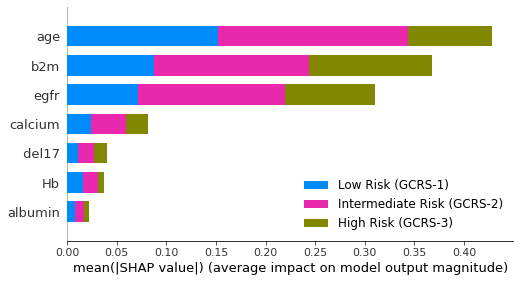

<Figure size 432x288 with 0 Axes>

In [ ]:
shap.summary_plot([shap_values[1][0],shap_values[0][0],shap_values[2][0]],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'], class_names=['Low Risk (GCRS-1)', 'Intermediate Risk (GCRS-2)', 'High Risk (GCRS-3)'],class_inds=[0,1,2],show=False)
#plt.rcParams['font.size'] = '20'
plt.show()
plt.savefig('MMRF_shap_features_combined.pdf', dpi=600, bbox_inches='tight')

In [ ]:
plt.xlabels()

AttributeError: ignored

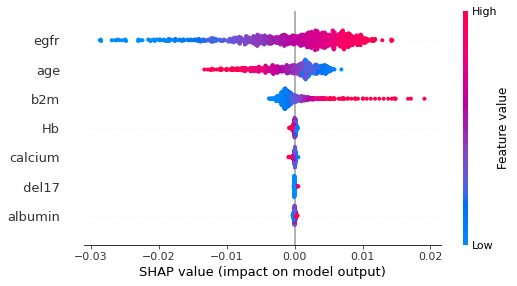

In [ ]:
shap.summary_plot(shap_values[1][0],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'],show=False)
plt.savefig('MMRF_shap_features_GCRS1.pdf', dpi=600, bbox_inches='tight')

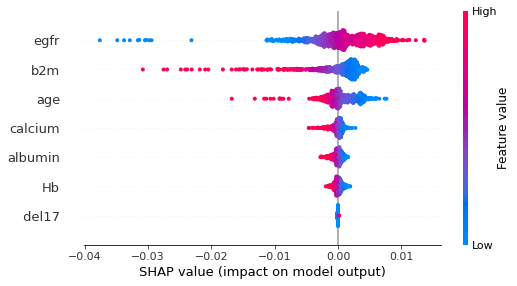

In [ ]:
shap.summary_plot(shap_values[0][0],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'], show=False)
plt.savefig('MMRF_shap_features_GCRS2.pdf', dpi=600, bbox_inches='tight')

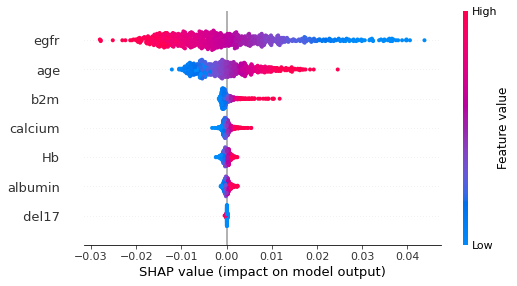

In [ ]:
shap.summary_plot(shap_values[2][0],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'], show=False)
plt.savefig('MMRF_shap_features_GCRS3.pdf', dpi=600, bbox_inches='tight')

In [ ]:
np.mean(np.diag(shap_values[0][1]))

0.0008434127041481829

In [ ]:
import cv2

shap0 = cv2.resize(shap_values[0][1],(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)
shap1 = cv2.resize(shap_values[1][1],(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)
shap2 = cv2.resize(shap_values[2][1],(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)
A = cv2.resize( A_.todense(),(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)

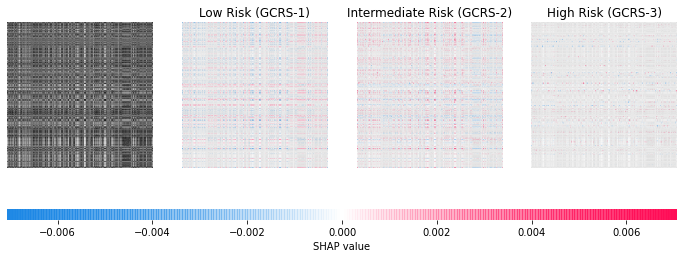

In [ ]:
shap.image_plot([shap1,shap0,shap2], A, labels = ['Low Risk (GCRS-1)', 'Intermediate Risk (GCRS-2)', 'High Risk (GCRS-3)'], show=False)
plt.savefig('MMRF_ADJ_shap_plot.pdf', dpi=600, bbox_inches='tight')

In [ ]:
chk = shap_values[0][1].copy()
pats_0 = np.mean(chk,axis=0).argsort()[-10:]

In [ ]:
chk = shap_values[1][1].copy()
pats_1 = np.mean(chk,axis=0).argsort()[-10:]

In [ ]:
chk = shap_values[2][1].copy()
pats_2 = np.mean(chk,axis=0).argsort()[:10]

In [ ]:
data_up = pd.read_csv('/content/mmrf_Data_Nov2020_CA_del17group.csv')

data_up = np.array(data_up)

os = data_up[0:, 3].astype(float)
#os = os/52
os_event = data_up[0:, 1].astype(int)
pfs = data_up[0:, 2].astype(float)
    #pfs = pfs/52
pfs_event = data_up[0:, 0].astype(int)
b2m = data_up[0:, 4].astype(float)
b2m = b2m * 10
albumin = data_up[0 :, 5].astype(float)
Hb = data_up[0:, 6].astype(float)
egfr = data_up[0:, 7].astype(float)
calcium = data_up[0:, 8].astype(float)
age = data_up[0:, 9].astype(int)
ldh= data_up[0:, 12]
del17=data_up[0:,14].astype(int)
iss = data_up[0:, 15].astype(int)   

data_matrix=np.stack((b2m, age, albumin, calcium, Hb, egfr, del17), axis = 1)


fet = ['b2m', 'age', 'albumin', 'calcium',' Hb', 'egfr', 'del17']

In [ ]:
pats_0, pats_1, pats_2

(array([254, 443, 424, 386, 120, 256, 483, 352, 494, 290]),
 array([613, 691, 585, 697, 331, 722,   3, 799, 450, 341]),
 array([254, 120, 424, 290, 161,  70, 256, 352, 492,  66]))

In [ ]:
preds = model.predict(graph, batch_size=A1.shape[0])

In [ ]:
for i in pats_0:      #intermediate
  print(y[i], preds[i])

2 [1.869030e-02 8.324920e-06 9.813014e-01]
2 [1.3570851e-02 1.0086898e-07 9.8642898e-01]
2 [1.6304865e-02 7.4018550e-05 9.8362112e-01]
2 [1.6994964e-02 8.6098647e-04 9.8214400e-01]
2 [1.4991466e-02 8.0692843e-07 9.8500764e-01]
2 [1.6370511e-02 3.4882843e-05 9.8359460e-01]
2 [1.6935762e-02 1.7686489e-04 9.8288745e-01]
2 [0.02512958 0.01803072 0.9568397 ]
2 [1.8184518e-02 5.1005307e-04 9.8130542e-01]
2 [1.4355771e-02 8.6504815e-06 9.8563552e-01]


In [ ]:
for i in pats_1:          #low
  print(y[i], preds[i])

1 [2.9712685e-03 9.9702877e-01 1.7457574e-10]
1 [2.9761728e-03 9.9702388e-01 1.7628604e-10]
1 [2.9720452e-03 9.9702793e-01 1.7475815e-10]
1 [2.9705579e-03 9.9702942e-01 1.7437884e-10]
1 [2.9673751e-03 9.9703264e-01 1.7331765e-10]
1 [2.9675313e-03 9.9703240e-01 1.7331166e-10]
1 [2.9681211e-03 9.9703181e-01 1.7349744e-10]
1 [2.9701539e-03 9.9702978e-01 1.7425987e-10]
1 [2.9652626e-03 9.9703479e-01 1.7249815e-10]
1 [2.9659264e-03 9.9703407e-01 1.7273970e-10]


In [ ]:
for i in pats_2:         #high
  print(y[i], preds[i])

2 [1.869030e-02 8.324920e-06 9.813014e-01]
2 [1.4991466e-02 8.0692843e-07 9.8500764e-01]
2 [1.6304865e-02 7.4018550e-05 9.8362112e-01]
2 [1.4355771e-02 8.6504815e-06 9.8563552e-01]
2 [0.07375732 0.01182789 0.91441476]
2 [1.1199479e-01 7.9330806e-05 8.8792592e-01]
2 [1.6370511e-02 3.4882843e-05 9.8359460e-01]
2 [0.02512958 0.01803072 0.9568397 ]
2 [2.3119465e-02 8.3505029e-06 9.7687221e-01]
2 [3.1555835e-02 8.7010552e-04 9.6757406e-01]


In [ ]:
feat_0 = data_matrix[pats_0]
feat_1 = data_matrix[pats_1]
feat_2 = data_matrix[pats_2]

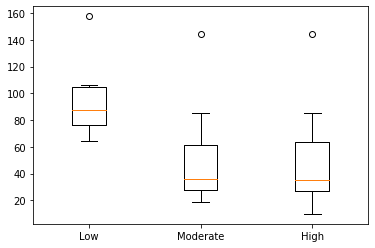

In [ ]:
plt.boxplot([feat_1[:,5],feat_0[:,5],feat_2[:,5]],labels=['Low','Moderate','High'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

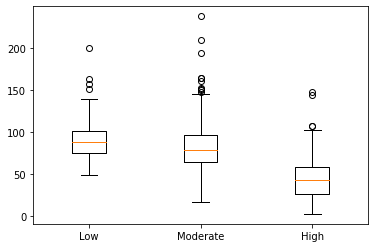

In [ ]:
plt.boxplot([feat_1[:,5],feat_0[:,5],feat_2[:,5]],labels=['Low','Moderate','High'])
plt.show()

In [ ]:
from scipy.stats import ttest_ind, wilcoxon

In [ ]:
wilcoxon(feat_1[:,5],feat_0[:,5])        # Low vs Moderate

WilcoxonResult(statistic=103.0, pvalue=0.9404706332885298)

In [ ]:
wilcoxon(feat_2[:,5],feat_0[:,5])        # High vs Moderate

WilcoxonResult(statistic=17.0, pvalue=0.0010188290449538871)

In [ ]:
wilcoxon(feat_2[:,5],feat_1[:,5])        # High vs Low

WilcoxonResult(statistic=10.0, pvalue=0.00039023125084089363)

In [ ]:
feat_0_orig = data_matrix[np.where(y == 0)[0]]
feat_1_orig = data_matrix[np.where(y == 1)[0]]
feat_2_orig = data_matrix[np.where(y == 2)[0]]

In [ ]:
plt.style.use('seaborn')

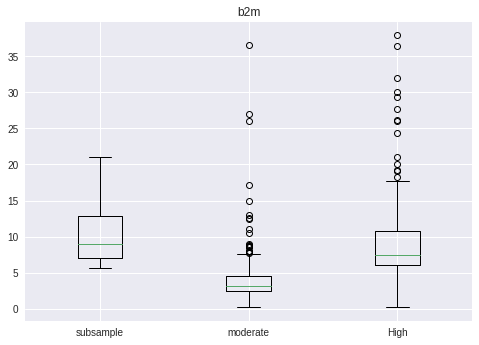

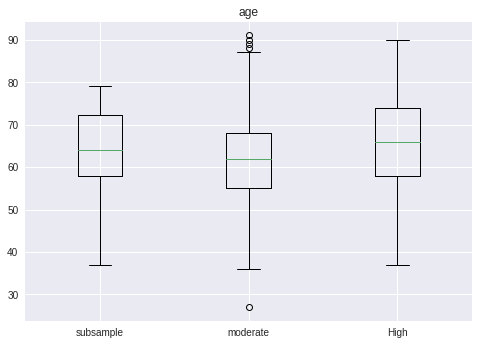

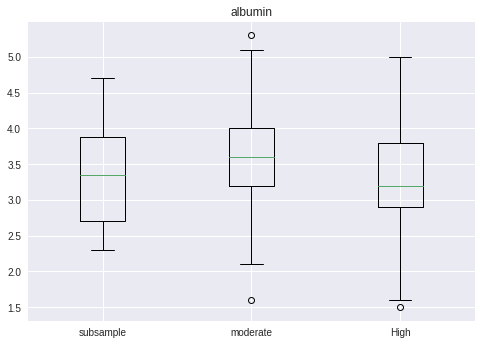

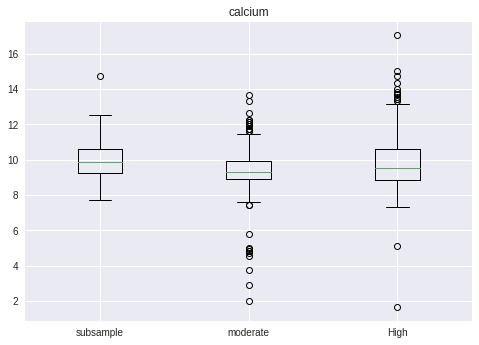

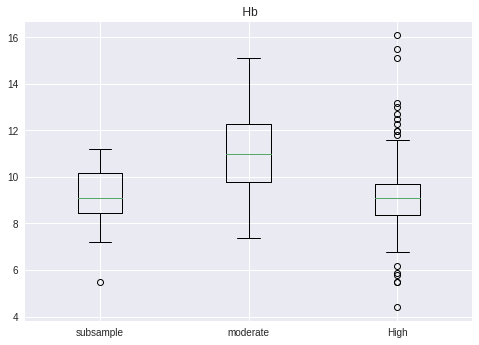

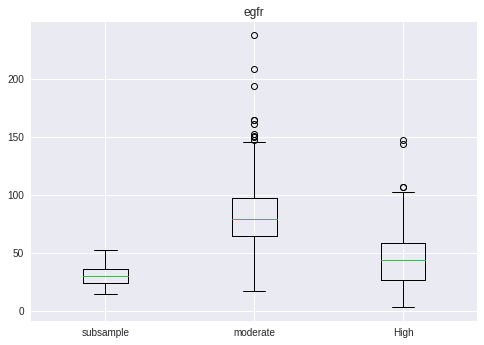

In [ ]:

for i in range(data_matrix.shape[1]-1):
  plt.boxplot([feat_0[:,i],feat_0_orig[:,i],feat_2_orig[:,i]],labels=['subsample','moderate','High'])
  plt.title(fet[i])
  plt.show()


In [ ]:
os_pat_0 = os[pats_0]
pfs_pat_0 = pfs[pats_0]

os_orig_mod = os[np.where(y == 0)[0]]
pfs_orig_mod = pfs[np.where(y == 0)[0]]

os_orig_high = os[np.where(y == 2)[0]]
pfs_orig_high = pfs[np.where(y == 2)[0]]

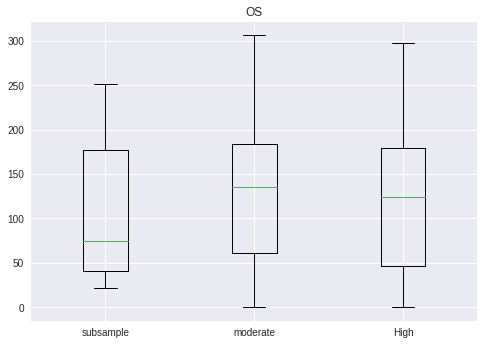

In [ ]:
plt.boxplot([os_pat_0,os_orig_mod, os_orig_high],labels=['subsample','moderate','High'])
plt.title('OS')
plt.show()

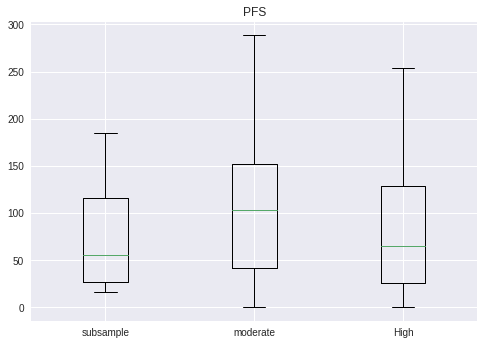

In [ ]:
plt.boxplot([pfs_pat_0,pfs_orig_mod, pfs_orig_high],labels=['subsample','moderate','High'])
plt.title('PFS')
plt.show()

In [ ]:
chk = shap_values[2][1]
sorted = chk.flatten().argsort()
low = sorted[:20]
high = sorted[-20:]
x_low, y_low = np.unravel_index(low,chk.shape)
x_high, y_high = np.unravel_index(high,chk.shape)

low = list(list(x_low) + list(y_low))
high = list(list(x_high) + list(y_high))




In [ ]:
from scipy.stats import wilcoxon, kruskal, ranksums

In [ ]:
preds = np.array(lab_pred)

In [ ]:
np.where(preds == 2 )[0]

array([  2,   9,  12,  16,  19,  22,  34,  35,  39,  42,  44,  46,  49,
        57,  61,  66,  69,  70,  79,  81,  82,  84,  88,  89,  90,  96,
        98,  99, 102, 104, 108, 112, 115, 120, 124, 125, 129, 131, 133,
       134, 135, 138, 153, 155, 156, 158, 159, 161, 163, 166, 170, 174,
       177, 179, 180, 183, 185, 193, 194, 195, 197, 202, 206, 209, 216,
       217, 224, 226, 232, 233, 244, 248, 251, 252, 254, 256, 257, 259,
       260, 261, 266, 267, 271, 274, 275, 283, 285, 290, 293, 299, 300,
       305, 309, 317, 321, 329, 333, 336, 339, 345, 352, 360, 366, 371,
       376, 384, 386, 389, 391, 393, 396, 397, 399, 403, 404, 412, 414,
       415, 420, 421, 424, 426, 428, 429, 441, 442, 443, 449, 451, 453,
       454, 463, 465, 467, 472, 476, 483, 492, 493, 494, 499, 502, 504,
       509, 514, 530, 531, 533, 536, 538, 541, 551, 552, 560, 564, 567,
       570, 578, 579, 589, 590, 599, 601, 606, 608, 611, 618, 622, 626,
       627, 633, 641, 644, 660, 680, 690, 693, 704, 734, 744, 76

In [ ]:
feats_0 = data_matrix[np.where(preds == 0 )[0]]
feats_1 = data_matrix[np.where(preds == 1 )[0]]
feats_2 = data_matrix[np.where(preds == 2 )[0]]

In [ ]:
preds

array([[7.1440220e-01, 3.8985748e-04, 2.8520787e-01],
       [2.9689483e-03, 9.9703097e-01, 1.7377084e-10],
       [1.3591549e-02, 1.0104885e-07, 9.8640835e-01],
       ...,
       [3.4469986e-01, 1.3215338e-06, 6.5529889e-01],
       [2.9658037e-03, 9.9703419e-01, 1.7272521e-10],
       [2.9701539e-03, 9.9702978e-01, 1.7425987e-10]], dtype=float32)

In [ ]:
b2m, age, albumin, calcium, Hb, egfr, del17

In [ ]:
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.)
sns.set_style('whitegrid', {'axes.facecolor':'white', 'grid.color':'lightgrey', 'axes.edgecolor':'white'})
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'lightgrey',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

In [ ]:
my_pal = {0: "g", 1: "b", 2:"r"}


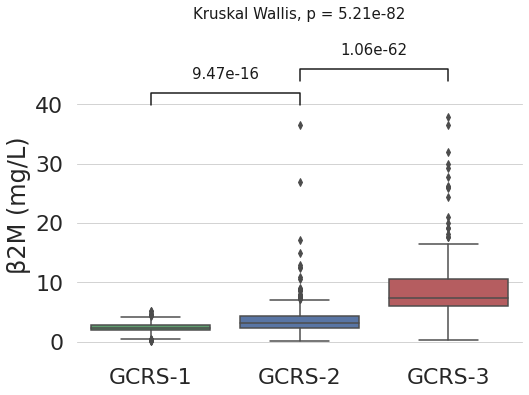

In [ ]:
# b2m
f = 0
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'β2M (mg/L)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 2, 2, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+2, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+4, y+h+4, y+h+4, y+4], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+6, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+12, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col,fontsize=15)
plt.savefig('/content/mmrf_box_b2m.pdf',format='pdf',dpi=600, facecolor='white')
plt.show()

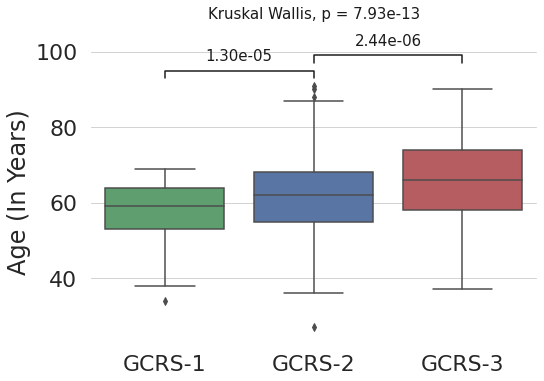

In [ ]:
# age
f = 1
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Age (In Years)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 2, 2, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+2, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+4, y+h+4, y+h+4, y+4], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+6, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+13, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/mmrf_box_age.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

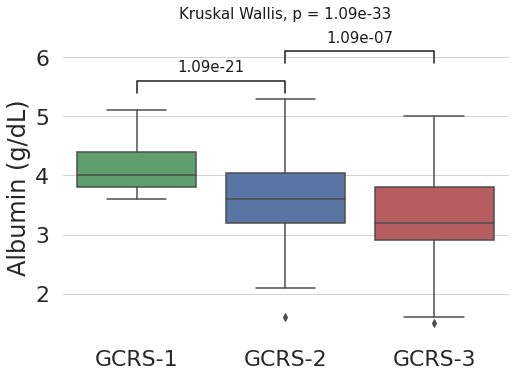

In [ ]:
# albumin
f = 2
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Albumin (g/dL)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 0.1, 0.2, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+0.1, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+0.5, y+h+0.5, y+h+0.5, y+0.5], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+0.6, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+1, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/mmrf_box_albumin.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

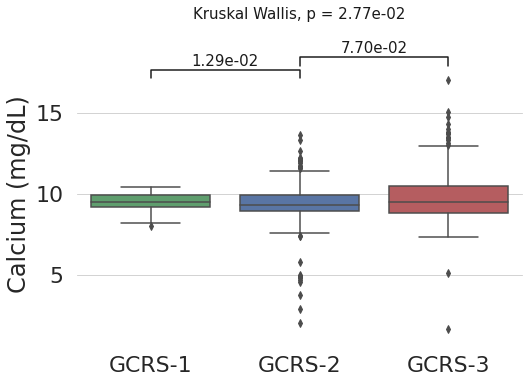

In [ ]:
# calcium
f = 3
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Calcium (mg/dL)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 0.1, 0.5, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+0.1, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+0.8, y+h+0.8, y+h+0.8, y+0.8], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+0.9, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+3, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/mmrf_box_calcium.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

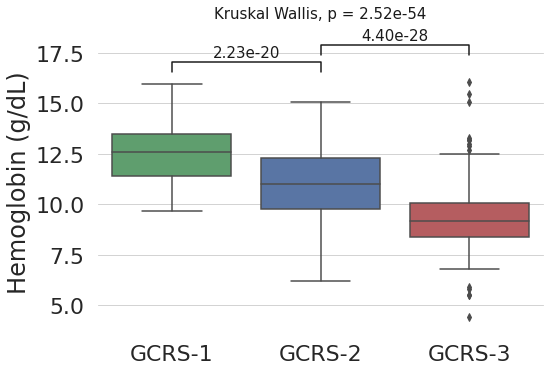

In [ ]:
# Hb
f = 4
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Hemoglobin (g/dL)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 0.5, 0.5, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+0.1, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+0.8, y+h+0.8, y+h+0.8, y+0.8], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+0.9, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+2, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/mmrf_box_Hb.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

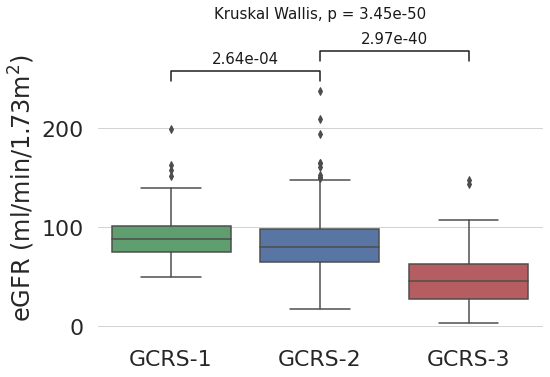

In [ ]:
# eGFR
f = 5
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'eGFR (ml/min/1.73m$^2$)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 10, 10, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+5, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+20, y+h+20, y+h+20, y+20], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+25, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+50, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/mmrf_box_eGFR.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

# Results on left out KNN-imputed MMRF Data

In [ ]:
mmrf_missing = pd.read_csv('/content/mmrf_missing_imputed_with_event.csv')

In [ ]:
mmrf_missing

,b2m,age,albumin,calcium,Hb,egfr,del17,os,os_event,pfs,pfs_event
0,0.891000,78.0,3.30,2.5000,6.758,34.559758,0.0,46.714286,1.0,46.714286,1.0
1,0.784000,50.0,2.50,1.9750,6.014,57.086293,0.0,281.285714,0.0,230.428571,1.0
2,0.279714,64.0,4.10,2.2000,7.006,76.848967,0.0,165.285714,0.0,165.285714,0.0
3,0.315000,75.0,3.90,2.2750,8.618,87.542957,0.0,72.571429,1.0,39.142857,1.0
4,0.151000,64.0,4.00,2.5250,8.804,90.407428,0.0,328.714286,0.0,31.142857,1.0
...,...,...,...,...,...,...,...,...,...,...,...
338,0.340000,59.0,3.80,2.3650,6.634,92.670948,0.0,56.857143,0.0,23.142857,0.0
339,0.055000,65.0,3.77,2.8250,7.750,71.493396,0.0,31.142857,0.0,17.142857,0.0
340,0.390000,65.0,3.50,2.2500,7.812,71.457143,1.0,44.285714,0.0,44.285714,0.0
341,0.077000,63.0,3.10,2.3000,5.890,55.381908,1.0,32.142857,0.0,32.142857,1.0


In [ ]:
data_up = np.array(mmrf_missing)


b2m = data_up[0:, 0].astype(float)
b2m = b2m * 10
albumin = data_up[0 :, 2].astype(float)
Hb = data_up[0:, 4].astype(float)
egfr = data_up[0:, 5].astype(float)
calcium = data_up[0:, 3].astype(float)
age = data_up[0:, 1].astype(int)

del17=data_up[0:,6].astype(int)  

X=np.stack((b2m, age, albumin, calcium, Hb, egfr, del17), axis = 1)


os = data_up[0:, 7].astype(float)
#os = os/52
os_event = data_up[0:, 8].astype(int)
pfs = data_up[0:, 9].astype(float)
    #pfs = pfs/52
pfs_event = data_up[0:, 10].astype(int)

In [ ]:
X /= X.sum(1).reshape(-1, 1)

(343, 343)


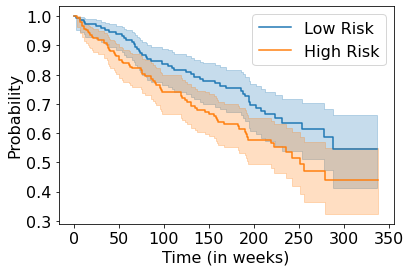

0.026984277361373075


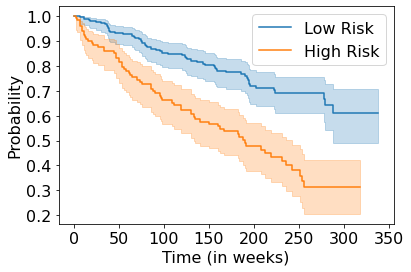

9.110825412509534e-08


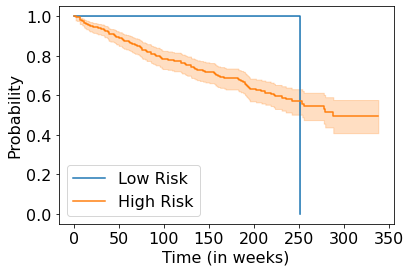

0.865575381903781


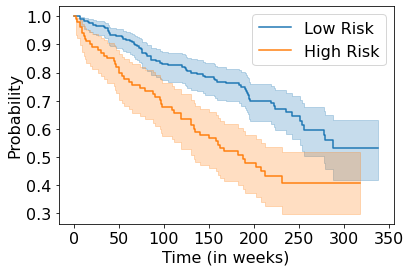

4.9620190658363916e-05


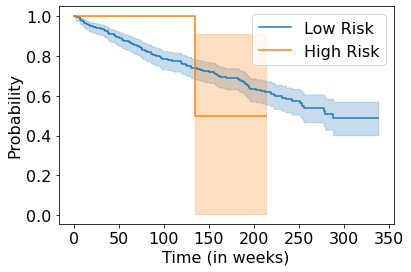

0.8123629238500414


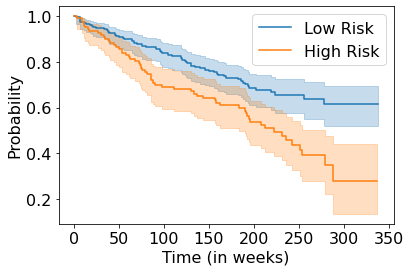

0.000504278534985257


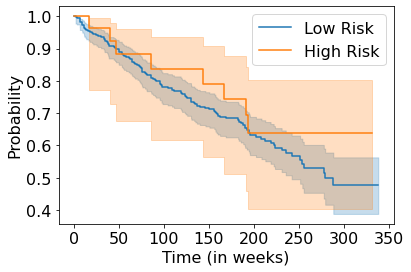

0.484542732959533


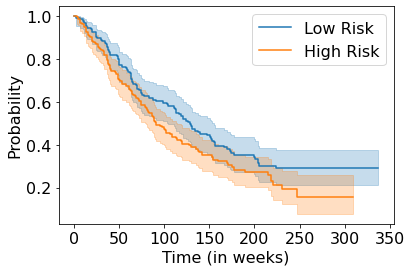

0.05767910687870134


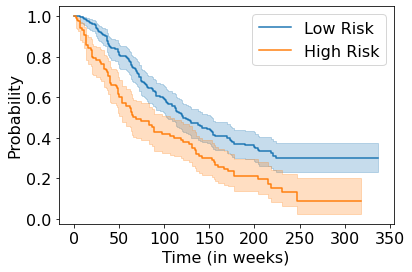

6.022196588019667e-05


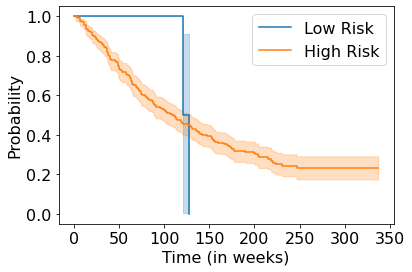

0.7359811187829225


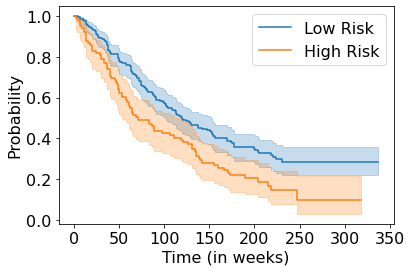

0.0006555911872583429


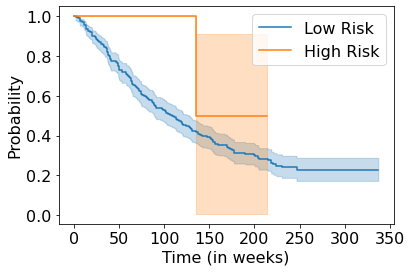

0.4398170485398052


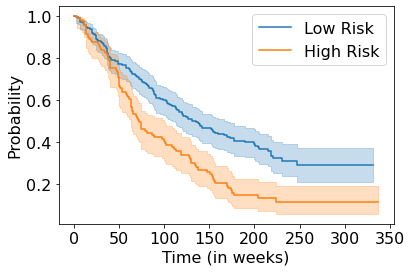

1.2736608272190188e-05


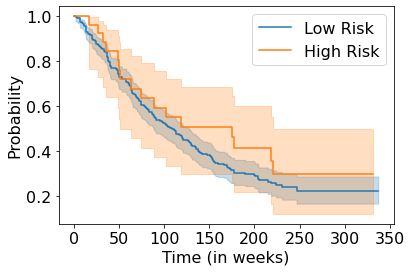

0.3118401648225515
[3.70586170e+01 1.09759539e+07 1.35873051e+00 2.01530866e+04
 2.27367266e+00 7.85138381e+04 3.20677101e+00]


In [ ]:
A1, A2, A3 = get_adjs(b2m, age, albumin, calcium, (Hb+0.2), egfr, del17,os, pfs, os_event, pfs_event)

A1 = A1 + -1*np.min(A1)

#A1[ A1 < 0.] = 0.

A1=scipy.sparse.csr_matrix(A1)
A2=scipy.sparse.csr_matrix(A2)
A3=scipy.sparse.csr_matrix(A3)

A1 = preprocess_adj(A1, SYM_NORM)
A2 = preprocess_adj(A2, SYM_NORM)
A3 = preprocess_adj(A3, SYM_NORM)


In [ ]:
alpha = 0.7
A_ = A1*alpha + A2*(alpha**2) + A3*(alpha**3)

In [ ]:
preds = model.predict([X,A_], batch_size=A1.shape[0])

lab_pred = list(np.argmax(preds,1))

0 84 259
inf
251.42857142857144
0.00011696610089731824 GCRS 1-2


ValueError: ignored

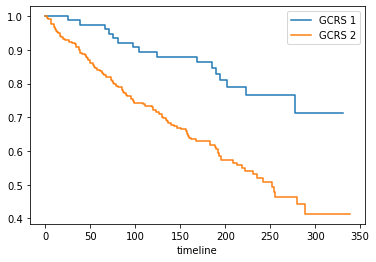

In [ ]:


print(lab_pred.count(2), lab_pred.count(1), lab_pred.count(0))
os_0 = []
os_1 = []
os_2 = []
os_ev_0 = []
os_ev_1 = []
os_ev_2 = []
for i in range(os_event.shape[0]):
       
    if lab_pred[i] == 0:
        os_0.append(os[i])
        os_ev_0.append(os_event[i])
    elif lab_pred[i] == 1:
        os_1.append(os[i])
        os_ev_1.append(os_event[i])
    else:
        os_2.append(os[i])
        os_ev_2.append(os_event[i])
        
kmf2 = KaplanMeierFitter()
kmf2.fit(os_1, os_ev_1, label='GCRS 1')
print(kmf2._median)
a2 = kmf2.plot(ci_show=False)
## fit the model for 2nd cohort
kmf2.fit(os_0, os_ev_0, label='GCRS 2')
print(kmf2._median)
kmf2.plot(ax = a2,ci_show=False)
results = logrank_test(os_0, os_1, event_observed_A = os_ev_0, event_observed_B = os_ev_1)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(os_2, os_ev_2, label='GCRS 3')
print(kmf2._median)
kmf2.plot(ax = a2, fontsize = 16,ci_show=False)#.get_figure().savefig('/content/MMRF_N800_OS.pdf')
results = logrank_test(os_1, os_2, event_observed_A = os_ev_1, event_observed_B = os_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 
#results = logrank_test(os_0, os_2, event_observed_A = os_ev_0, event_observed_B = os_ev_2)
# results.print_summary()
#print(results.p_value, "inter high") 
a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 13)
plt.show()
from lifelines.statistics import multivariate_logrank_test
results = multivariate_logrank_test(os, lab_pred, os_event)
print("\n P value : ",results.p_value)


PFS Analysis
172.4285714285714 **
89.2857142857143 **
0.00019929779706270135 GCRS 1-2


ValueError: ignored

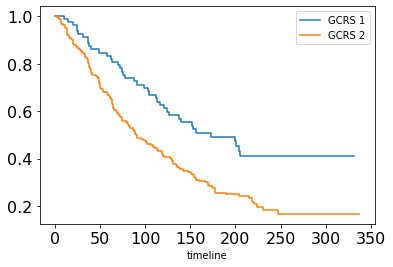

In [ ]:
##PFS anaylsis on training data for MRS
print("PFS Analysis")
pfs_0 = []
pfs_1 = []
pfs_2 = []
pfs_ev_0 = []
pfs_ev_1 = []
pfs_ev_2 = []
for i in range(pfs.shape[0]):    
    if lab_pred[i] == 0:
        pfs_0.append(pfs[i])
        pfs_ev_0.append(pfs_event[i])
    elif lab_pred[i] == 1:
        pfs_1.append(pfs[i])
        pfs_ev_1.append(pfs_event[i])
    else:
        pfs_2.append(pfs[i])
        pfs_ev_2.append(pfs_event[i])
        
        
kmf2 = KaplanMeierFitter()
## fit the model for 2nd cohort
kmf2.fit(pfs_1, pfs_ev_1, label='GCRS 1')
print(kmf2._median, "**")
a2 = kmf2.plot(ci_show=False)


kmf2.fit(pfs_0, pfs_ev_0, label='GCRS 2')
print(kmf2._median, "**")
kmf2.plot(ax = a2, fontsize = 16,ci_show=False)

results = logrank_test(pfs_1, pfs_0, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_0)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(pfs_2, pfs_ev_2, label='GCRS 3')
print(kmf2._median, "**")
kmf2.plot(ax = a2,ci_show=False)#.get_figure().savefig('/content/MMRF_N800_PFS.pdf')

results = logrank_test(pfs_1, pfs_2, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 

a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

results = multivariate_logrank_test(pfs, lab_pred, pfs_event)
print("\n P value : ",results.p_value)

In [ ]:
lab_pred

[0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
mmrf_missing

,b2m,age,albumin,calcium,Hb,egfr,del17,os,os_event,pfs,pfs_event
0,0.891000,78.0,3.30,2.5000,6.758,34.559758,0.0,46.714286,1.0,46.714286,1.0
1,0.784000,50.0,2.50,1.9750,6.014,57.086293,0.0,281.285714,0.0,230.428571,1.0
2,0.279714,64.0,4.10,2.2000,7.006,76.848967,0.0,165.285714,0.0,165.285714,0.0
3,0.315000,75.0,3.90,2.2750,8.618,87.542957,0.0,72.571429,1.0,39.142857,1.0
4,0.151000,64.0,4.00,2.5250,8.804,90.407428,0.0,328.714286,0.0,31.142857,1.0
...,...,...,...,...,...,...,...,...,...,...,...
338,0.340000,59.0,3.80,2.3650,6.634,92.670948,0.0,56.857143,0.0,23.142857,0.0
339,0.055000,65.0,3.77,2.8250,7.750,71.493396,0.0,31.142857,0.0,17.142857,0.0
340,0.390000,65.0,3.50,2.2500,7.812,71.457143,1.0,44.285714,0.0,44.285714,0.0
341,0.077000,63.0,3.10,2.3000,5.890,55.381908,1.0,32.142857,0.0,32.142857,1.0


In [ ]:
X.shape

(800, 7)

247.6

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
preds = list(lab_pred)

In [ ]:
cm = confusion_matrix(y, preds)
cm

array([[436,   0,  14],
       [  0, 174,   0],
       [  3,   0, 173]])

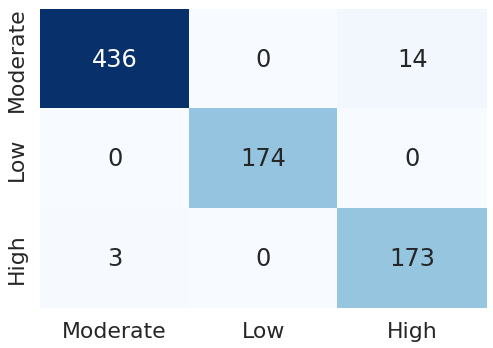

In [ ]:
cmd = pd.DataFrame(cm,['Moderate', 'Low', 'High'],['Moderate', 'Low', 'High'])
sns.set(font_scale=2.)
sns.heatmap(cmd, annot=True,fmt='', cmap="Blues", cbar=False)
plt.savefig('/content/mmrf_conf.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

In [ ]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
for font in font_manager.findSystemFonts('/content/palatino'):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'palatino'

In [ ]:
shap_values[0][0].shape

(800, 7)

In [ ]:
preds = np.array(lab_pred)

In [ ]:
shap_0 = shap_values[0][0][np.where(preds == 0 )[0]]
shap_1 = shap_values[1][0][np.where(preds == 1 )[0]]
shap_2 = shap_values[2][0][np.where(preds == 2 )[0]]

In [ ]:
shap_1.shape

(174, 7)

In [ ]:
pat_inds = [5,20]

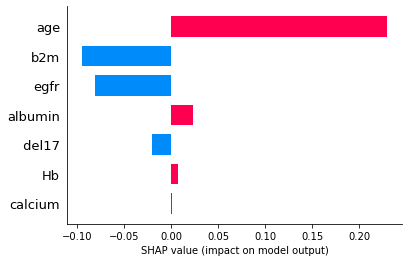

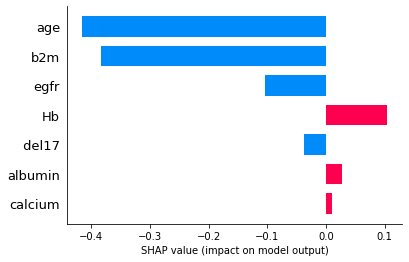

In [ ]:
for i in pat_inds:
  shap.bar_plot(shap_1[i], feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'])

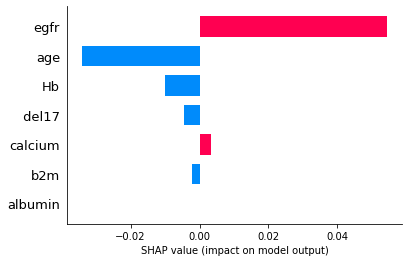

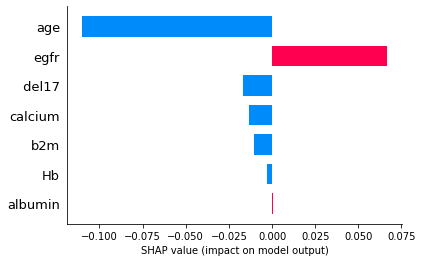

In [ ]:
for i in pat_inds:
  shap.bar_plot(shap_0[i], feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'])

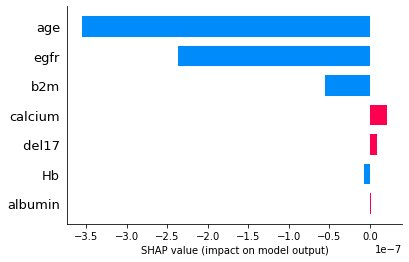

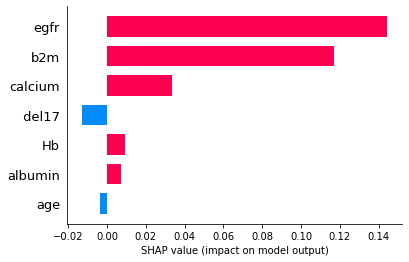

In [ ]:
pat_inds = [10,1]
for i in pat_inds:
  shap.bar_plot(shap_2[i], feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'])